In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
data.tail()

,881001.WI,513500.SH,159920.SZ,518880.SH,H11025.CSI
2019-04-12,4381.4391,2907.41,29909.76,11124.5281,1522.3401
2019-04-15,4354.3076,2905.58,29810.72,11065.4897,1522.6536
2019-04-16,4457.8845,2907.06,30129.87,11259.2923,1522.7617
2019-04-17,4476.3576,2900.45,30124.68,11197.1700,1522.8707
2019-04-18,4454.9795,2905.03,29963.26,11086.2570,1522.8707


In [4]:
data_pct = data.pct_change().dropna()

In [5]:
data_pct.head()

,881001.WI,513500.SH,159920.SZ,518880.SH,H11025.CSI
2005-01-05,0.013144,-0.003628,-0.020044,0.012885,0.000091
2005-01-06,-0.009197,0.003506,-0.003801,-0.065266,0.000092
2005-01-07,0.002397,-0.001431,-0.010004,-0.003254,0.000084
2005-01-10,0.009301,0.003423,-0.003202,0.013951,0.000233
2005-01-11,0.003220,-0.006100,-0.001636,-0.001171,0.000082


In [8]:
data_roll = data_pct.rolling(window = 60)

data_sigma = data_roll.std()

data_sigma = data_sigma.dropna()

data_sigma.head()

trade_calendar = data_sigma.index.tolist()

rebalance_freq = 20
rebalance_flag = 20

ret_list = []
for ind,trade_date in enumerate(trade_calendar):
    if rebalance_flag == rebalance_freq:
        # calculate the return
        sigma = data_sigma.loc[trade_date]
        sigma.sort_values(ascending = True)
        long_asset = sigma.index.tolist()[1]
        short_asset = sigma.index.tolist()[-1]
        data_related = data.iloc[ind:ind + rebalance_freq]
        long_related = data_related[long_asset]
        short_related = data_related[short_asset]
        long_ret = (long_related.iloc[-1] - long_related.iloc[0]) / long_related.iloc[0]
        short_ret = ((short_related.iloc[-1] - short_related.iloc[0]) / short_related.iloc[0])
        diff_ret = long_ret - short_ret
        ret_list.append([trade_date,diff_ret])
        rebalance_flag = 0
    rebalance_flag += 1
    



In [9]:
ret_df = pd.DataFrame(ret_list,columns = ['trade_date','ret']).set_index('trade_date')

In [10]:
ret_df.head()

,ret
trade_date,
2005-04-07,-0.008060
2005-05-12,0.011602
2005-06-09,-0.023242
2005-07-07,-0.019221
2005-08-04,0.028852


In [ ]:
ret_df.head()

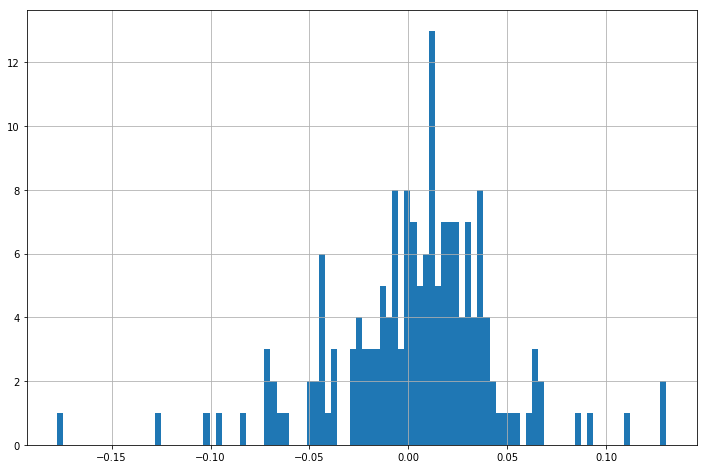

In [11]:
ret_df['ret'].hist(bins = 100,figsize = (12,8))

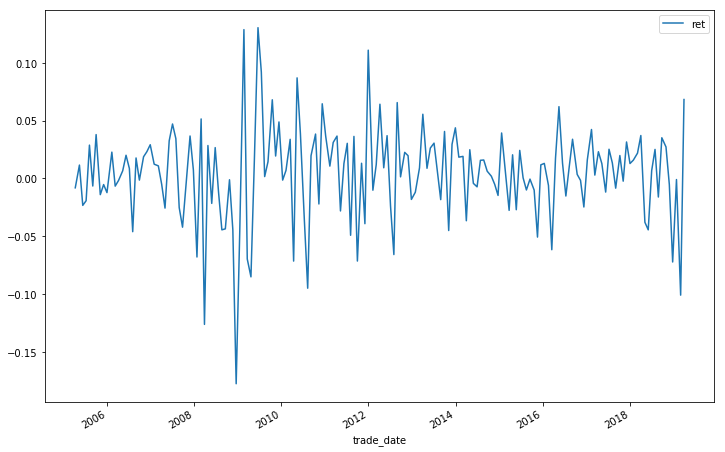

In [12]:
ax = ret_df.plot(figsize = (12,8))

In [14]:
from scipy.stats import ttest_1samp
result = ttest_1samp(ret_df,popmean = 0)
result

Ttest_1sampResult(statistic=array([1.36449973]), pvalue=array([0.17421383]))

低波动率能够带来超额收益。

In [71]:
data_sigma.to_excel('60sigma.xlsx')